In [ ]:
import os
import imageio

def gif_to_frames(input_path, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Read the GIF
    gif_reader = imageio.get_reader(input_path)

    # Loop through each frame and save it as an image
    for i, frame in enumerate(gif_reader):
        frame_path = os.path.join(output_folder, f"frame_{i}.png")
        imageio.imwrite(frame_path, frame)

    print(f"Frames extracted and saved to {output_folder}")

# Example usage
input_gif_path = 'video.gif'  # Replace with the path to your input GIF
output_frames_folder = 'output_frames'  # Replace with the desired output folder

gif_to_frames(input_gif_path, output_frames_folder)


Frames extracted and saved to output_frames


In [ ]:
!pip install face_recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=d25bf2c566e108cb34fb80e895fdceee86673ffc8a1d81534f9706a4511d3b9b
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import face_recognition
from PIL import Image, ImageDraw

def detect_and_draw_features(image_path, output_path):
    # Load the image
    image = face_recognition.load_image_file(image_path)

    # Find face locations
    face_locations = face_recognition.face_locations(image)

    # Find facial landmarks
    face_landmarks_list = face_recognition.face_landmarks(image)

    # Create a PIL ImageDraw object
    pil_image = Image.fromarray(image)
    draw = ImageDraw.Draw(pil_image)

    # Loop through each face and draw features
    for face_location, face_landmarks in zip(face_locations, face_landmarks_list):
        top, right, bottom, left = face_location

        # Draw face outline
        draw.polygon([(left, top), (right, top), (right, bottom), (left, bottom)], outline="red", width=2)

        # Draw eyes outline
        for eye_points in [face_landmarks['left_eye'], face_landmarks['right_eye']]:
            draw.polygon(eye_points, outline="blue", width=2)

        # Draw nose outline
        draw.polygon(face_landmarks['nose_bridge'], outline="green", width=2)
        draw.polygon(face_landmarks['nose_tip'], outline="green", width=2)

    # Save the result
    pil_image.save(output_path)


In [ ]:
import os

# Set input and output folders
input_folder = 'output_frames'  # Replace with the path to your input images folder
output_folder = 'processed_folder'  # Replace with the desired output processed folder

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Loop through each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
        input_image_path = os.path.join(input_folder, filename)
        output_result_path = os.path.join(output_folder, f"processed_{filename}")

        # Call the function to detect and draw eyes on the image
        detect_and_draw_features(input_image_path, output_result_path)

print(f"All images processed and saved to {output_folder}")


All images processed and saved to processed_folder


In [ ]:
!pip install face_recognition
import face_recognition
from PIL import Image, ImageDraw
import os

# Function to extract face ROI from an image using face_recognition
def extract_and_draw_features(image_path, output_path):
    image = face_recognition.load_image_file(image_path)
    face_landmarks_list = face_recognition.face_landmarks(image)

    if len(face_landmarks_list) > 0:
        face_landmarks = face_landmarks_list[0]

        # Create a PIL ImageDraw object
        pil_image = Image.fromarray(image)
        draw = ImageDraw.Draw(pil_image)

        # Draw face outline
        top, right, bottom, left = face_recognition.face_locations(image)[0]
        draw.polygon([(left, top), (right, top), (right, bottom), (left, bottom)], outline="red", width=2)

        # Draw eyes outline
        for eye_points in [face_landmarks['left_eye'], face_landmarks['right_eye']]:
            draw.polygon(eye_points, outline="blue", width=2)

        # Draw nose outline
        draw.polygon(face_landmarks['nose_bridge'], outline="green", width=2)
        draw.polygon(face_landmarks['nose_tip'], outline="green", width=2)

        # Save the result
        pil_image.save(output_path)
    else:
        print(f"No face detected in {image_path}")

# Function to apply face extraction and feature outlining to all images in a directory using face_recognition
def extract_and_draw_features_from_directory(input_directory, output_directory):
    i = 0  # Initialize i here
    for root, dirs, files in os.walk(input_directory):
        for file in files:
            input_path = os.path.join(root, file)
            output_path = os.path.join(output_directory, f"processed_{file}")

            extract_and_draw_features(input_path, output_path)
            i += 1
            if i % 1000 == 0:
                print(f"{i} images processed so far.")

# Specify the input and output directories
input_directory = 'output_frames'  # Replace with the actual path
output_directory = 'result'  # Replace with the actual path

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Call the function to extract faces and draw features using face_recognition
extract_and_draw_features_from_directory(input_directory, output_directory)


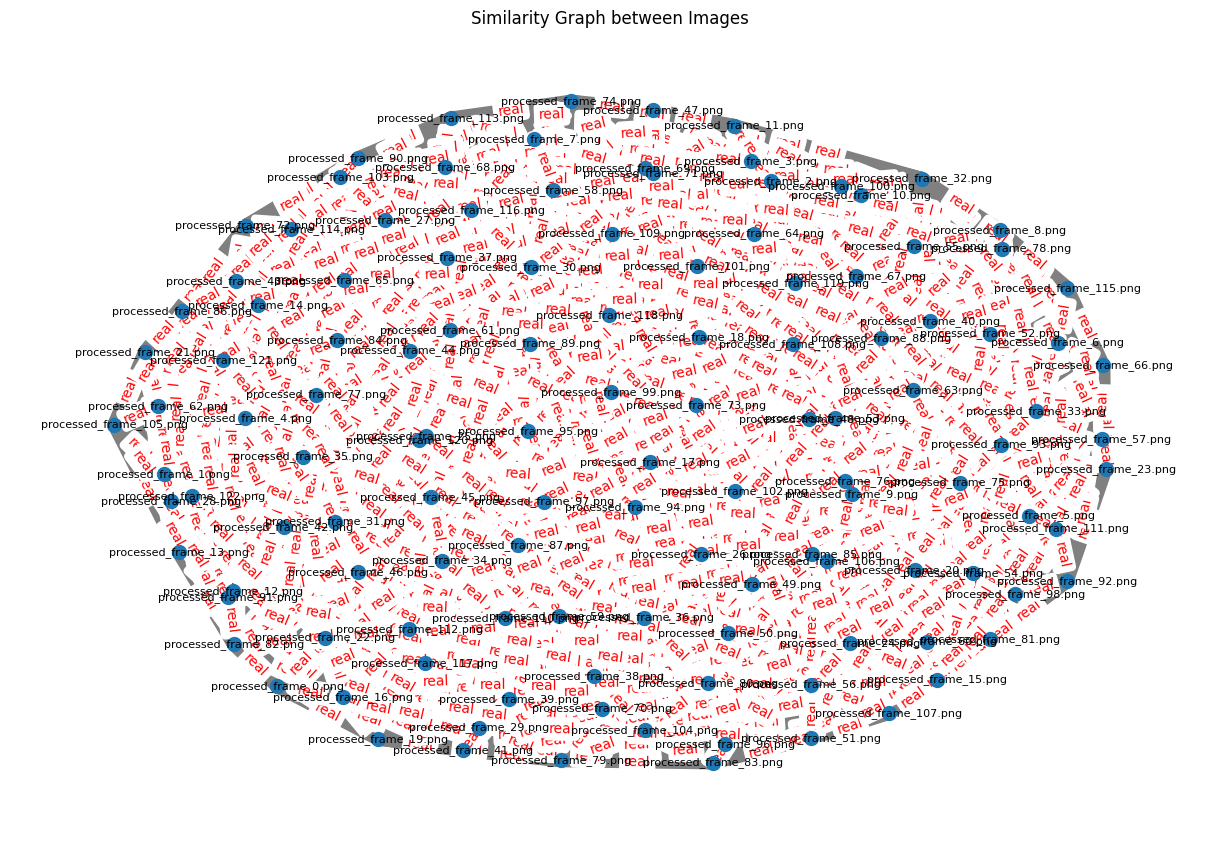

In [ ]:
import os
import face_recognition
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Function to get face embeddings using face_recognition
def get_face_embedding(image_path):
    image = face_recognition.load_image_file(image_path)
    face_encodings = face_recognition.face_encodings(image)

    if len(face_encodings) > 0:
        return face_encodings[0]
    else:
        return None

# Function to compute cosine similarity between two embeddings
def cosine_similarity(embedding1, embedding2):
    if embedding1 is None or embedding2 is None:
        return 0.0  # Default similarity for invalid embeddings

    dot_product = np.dot(embedding1, embedding2)
    norm_embedding1 = np.linalg.norm(embedding1)
    norm_embedding2 = np.linalg.norm(embedding2)

    similarity = dot_product / (norm_embedding1 * norm_embedding2)

    return similarity

# Function to create a similarity graph
def create_similarity_graph(directory, threshold=0.8):
    graph = nx.Graph()

    # Store embeddings in a dictionary
    embeddings_dict = {}

    # Loop through each image in the directory
    for root, dirs, files in os.walk(directory):
        for file in files:
            image_path = os.path.join(root, file)

            # Get face embedding
            embedding = get_face_embedding(image_path)

            if embedding is not None:
                # Add node to the graph
                graph.add_node(file)
                embeddings_dict[file] = embedding

    # Compute pairwise similarities and add edges to the graph
    for file1 in embeddings_dict:
        for file2 in embeddings_dict:
            if file1 != file2 and not graph.has_edge(file1, file2):
                similarity = cosine_similarity(embeddings_dict[file1], embeddings_dict[file2])

                # Check if similarity is greater than or equal to the threshold
                if similarity >= threshold:
                    graph.add_edge(file1, file2, weight=similarity, label="real")
                else:
                    graph.add_edge(file1, file2, weight=similarity, label="fake")

    return graph

# Function to plot the similarity graph
def plot_similarity_graph(graph):
    pos = nx.spring_layout(graph)
    edge_labels = nx.get_edge_attributes(graph, 'label')
    weights = [graph[u][v]['weight'] * 10 for u, v in graph.edges()]

    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, font_size=8, font_color='black', node_size=100, width=weights, edge_color='gray')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')
    plt.title("Similarity Graph between Images")
    plt.show()

# Specify the input directory
input_directory = 'result'  # Replace with the actual path

# Create the similarity graph with a threshold of 80%
similarity_graph = create_similarity_graph(input_directory, threshold=0.8)

# Plot the similarity graph
plot_similarity_graph(similarity_graph)
